In [1]:
#simple code for predicting linear regression from scratch
#This code takes just one row as variable and predicts linear regression as y = A0 + A1x 

In [9]:
#first, let's define a function for calculating mean value of the array and variance

def mean(values):
    return (sum(values)/float(len(values)))

def variance(values):
    return sum((x - mean(values))**2 for x in values)

In [10]:
variance([1,2,3,4,5])

10.0

In [19]:
#I will also use covariance, so here is a function to calculate covariance

def covar(x,y):
    covar = 0.0
    mx = mean(x)
    my = mean(y)
    for i in range(len(x)):
        covar = covar + (x[i]-mx)*(y[i]-my)
    return covar

In [20]:
covar([1,2,3],[4,5,6])

2.0

In [21]:
#Now I go and calculate the coefficients (A0 and A1), which I will later use for prediction algorithm

In [52]:
def A1(x,y):
    return covar(x,y)/variance(x)
def A0(x,y):
    return mean(y) - mean(x)*A1(x,y)
#maybe i could have put these two function into one that returns a tupple, but for now this is OK with me)

In [53]:
#Now for the predictions: I will define a function for fitting the trained values into an array.
#Training will be implemented in the function at this point, maybe I will look into separating those two later

def fit(x_train, y_train, x):
    y = []
    k = A1(x_train, y_train)
    n = A0(x_train, y_train)
    for i in x:
        y.append(k*i + n)
    return y
    

In [91]:
fit([1,2,3],[2,4,6],[7,8,9])


3.0

In [105]:
#Now for some metrics: Ill write again simple functions for calculating RMSE 
def RMSE(actual, predicted):
    err = 0.0
    from math import sqrt
    for i in range(len(actual)):
        err = err + (actual[i] - predicted[i])**2
        mean_error = err/(float(len(actual)))
    return sqrt(mean_error)

RMSE([1,2,3],[4,5,6])

3.0

In [57]:
#Lets test it!

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
data = pd.read_csv('/home/bbborisk/Documents/MyProjects/data_science_course_1/auto-mpg.csv')

In [109]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


<AxesSubplot:>

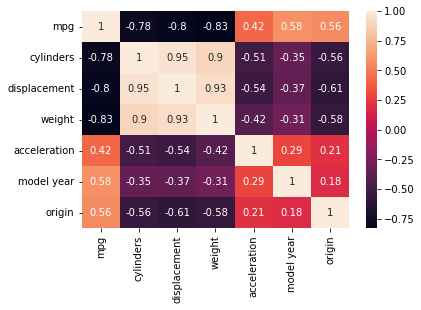

In [110]:
sns.heatmap(data.corr(), annot = True)

In [111]:
x = data['weight']
y = data['mpg']

In [130]:
import numpy as np
np.array(y_test)

array([34.2, 34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 33.5, 41.5, 38.1, 32.1,
       37.2, 28. , 26.4, 24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6,
       27.9, 40.8, 44.3, 43.4, 36.4, 30. , 44.6, 40.9, 33.8, 29.8, 32.7,
       23.7, 35. , 23.6, 32.4, 27.2, 26.6, 25.8, 23.5, 30. , 39.1, 39. ,
       35.1, 32.3, 37. , 37.7, 34.1, 34.7, 34.4, 29.9, 33. , 34.5, 33.7,
       32.4, 32.9, 31.6, 28.1, 30.7, 25.4, 24.2, 22.4, 26.6, 20.2, 17.6,
       28. , 27. , 34. , 31. , 29. , 27. , 24. , 23. , 36. , 37. , 31. ,
       38. , 36. , 36. , 36. , 34. , 38. , 32. , 38. , 25. , 38. , 26. ,
       22. , 32. , 36. , 27. , 27. , 44. , 32. , 28. , 31. ])

In [113]:
x_train = x[:300]
x_test = x[301:]
y_train = y[:300]
y_test = y[301:] 

In [131]:
pred = fit(x_train,y_train,x_test)


In [133]:
RMSE(np.array(y_test), pred)
#there is certainly a better way to do this than turning y_test into array, but for now this will do :)

8.191582260108518